In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
df=pd.read_csv('engine_vibration_data.csv')
df

,Engine RPM,Vibration Amplitude (mm/s)
0,500.000000,3130.200783
1,504.504505,3117.703877
2,509.009009,3108.068781
3,513.513514,3098.632407
4,518.018018,3083.950927
...,...,...
995,4981.981982,1960.996900
996,4986.486486,1974.053916
997,4990.990991,1980.660173
998,4995.495495,1987.176579


In [3]:
x=df['Engine RPM']
y=df['Vibration Amplitude (mm/s)']

In [4]:
# y=ae^bx+c
def exp__model(x, a, b, c):
    return a * np.exp(b * x) + c

In [5]:
params,_=curve_fit(exp__model,x,y,p0=[3500,-0.015,200])

c:\Users\ANJAL\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
y_pred=exp__model(x,*params)
y_pred

0      3606.535731
1      3581.223754
2      3556.117697
3      3531.215883
4      3506.516653
          ...     
995     496.063865
996     496.056391
997     496.048979
998     496.041627
999     496.034334
Name: Engine RPM, Length: 1000, dtype: float64

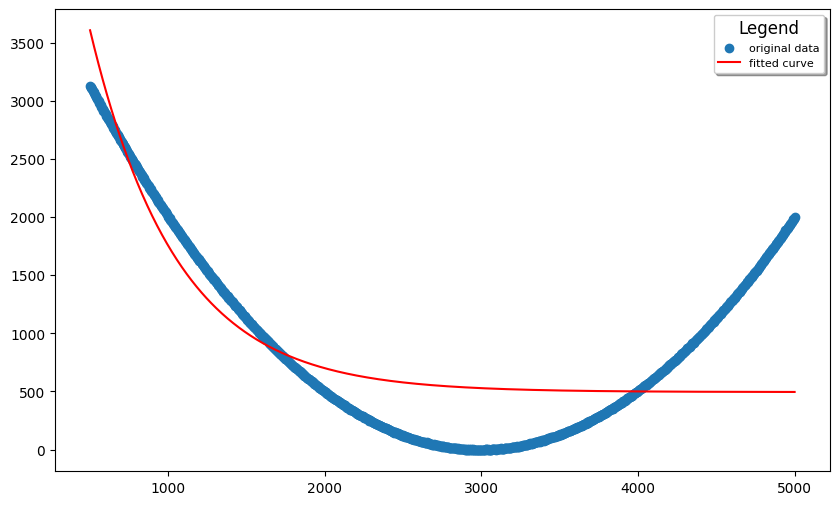

In [7]:
plt.figure(figsize=[10,6])
plt.scatter(x,y,label='original data')
plt.plot(x,y_pred,label='fitted curve',color='red')
plt.legend(loc='upper right',shadow=True,title_fontsize=12,title='Legend',fontsize=8)
plt.show()

In [8]:
new=np.array([[504.504505]])
data=exp__model(new,*params)
data

array([[3581.2237514]])